In [4]:
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.ndimage import median_filter

from source.helper import to_dB, print_spectogram, gen_spectogram, diff_frames

In [5]:
BASE_DIR = Path("E:/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r')

In [6]:
loaded_file['2023_03_21'].keys()

<KeysViewHDF5 ['background', 'bartek_sciana', 'biegunko_1os_2m_rafal', 'chodzonko_1os_2m_bartek', 'chodzonko_1os_4-1-8m_bartek', 'chodzonko_2os_2m_bartek_3m_oskar', 'chodzonko_2os_2m_oskar_3m_bartek', 'odleglosc_1m_bartek_bokiem', 'odleglosc_1m_bartek_przodem', 'odleglosc_2m_bartek_bokiem', 'odleglosc_2m_bartek_przodem', 'odleglosc_3m_bartek_bokiem', 'odleglosc_3m_bartek_przodem', 'odleglosc_4m_bartek_bokiem', 'odleglosc_4m_bartek_przodem', 'randomowe_chodzonko_1os_bartek', 'randomowe_chodzonko_3os', 'wiatrak_1m', 'wiatrak_2m', 'wiatrak_2m_bartek_sciana', 'wiatrak_3m', 'wiatrak_4m', 'wysoki_niski_3m_oskar_bartek_przodem']>

In [7]:
sample_file = loaded_file['2023_03_21']['chodzonko_1os_4-1-8m_bartek']
sample_file = sample_file[:, 0, 0, :]

----------------------------------------------------------
FILE: wysoki_niski_3m_oskar_bartek_przodem


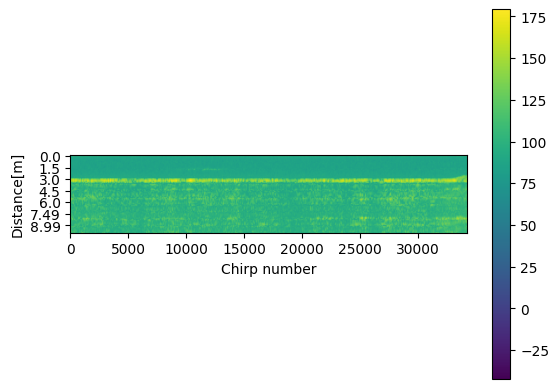

----------------------------------------------------------
FILE: wiatrak_4m


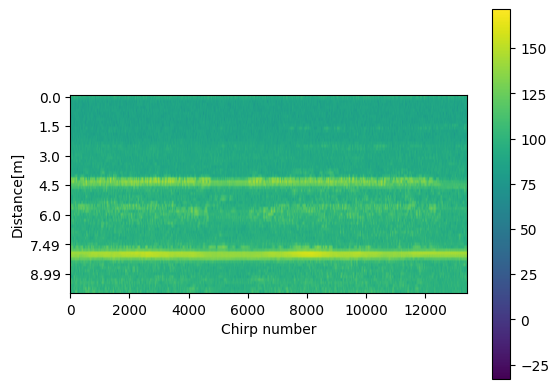

----------------------------------------------------------
FILE: wiatrak_2m_bartek_sciana


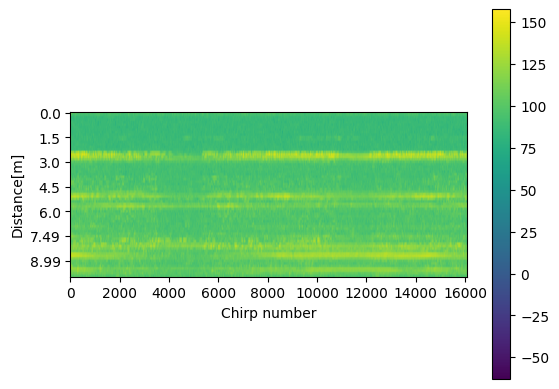

----------------------------------------------------------
FILE: randomowe_chodzonko_3os


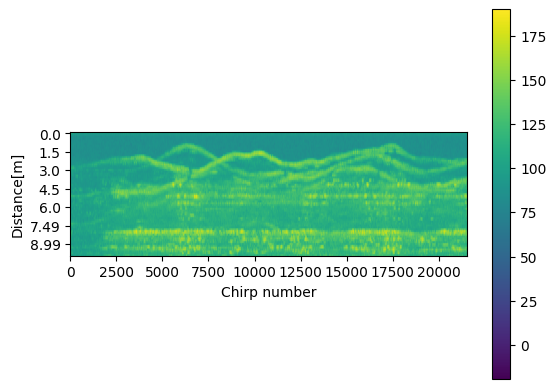

----------------------------------------------------------
FILE: randomowe_chodzonko_1os_bartek


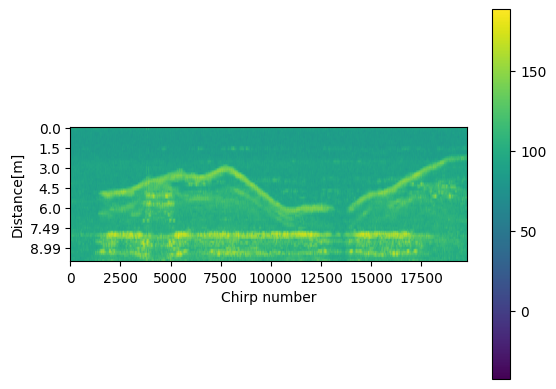

----------------------------------------------------------
FILE: odleglosc_4m_bartek_bokiem


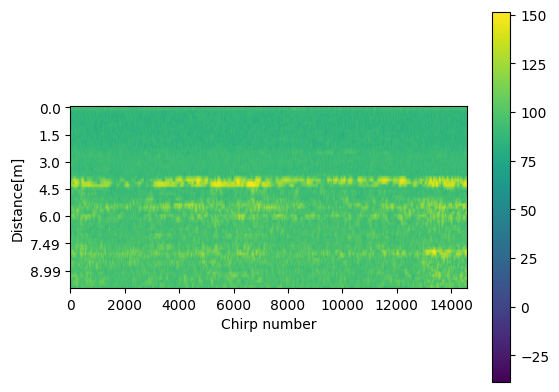

----------------------------------------------------------
FILE: chodzonko_2os_2m_bartek_3m_oskar


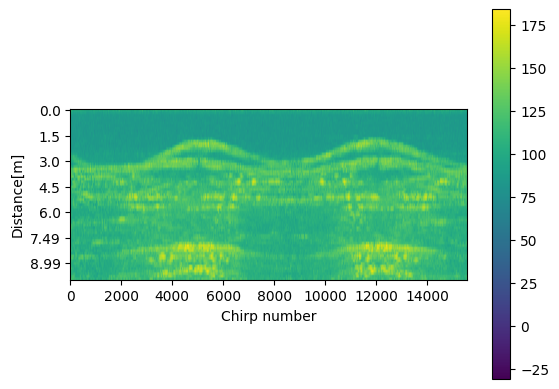

----------------------------------------------------------
FILE: chodzonko_1os_4-1-8m_bartek


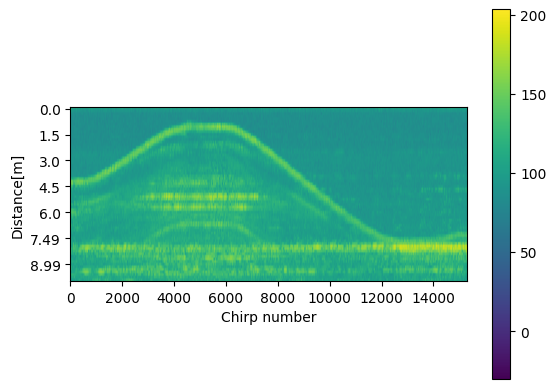

----------------------------------------------------------
FILE: bartek_sciana


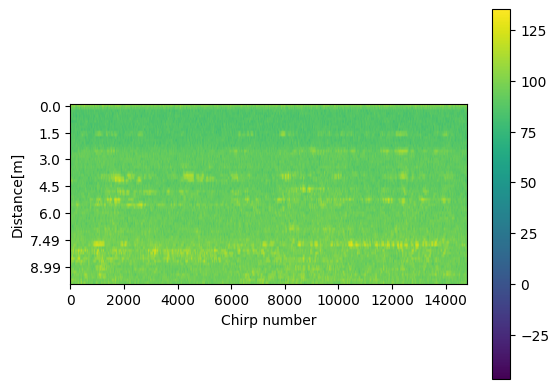

----------------------------------------------------------
FILE: biegunko_1os_2m_rafal


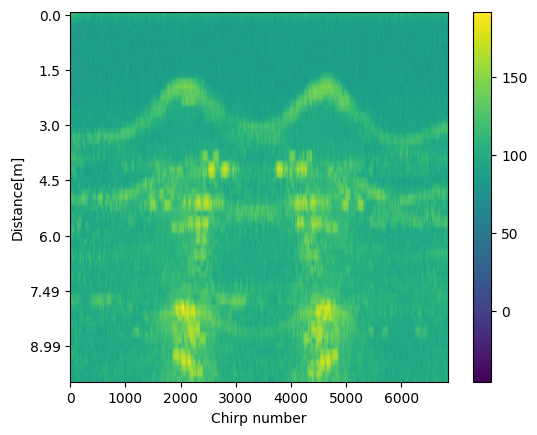

----------------------------------------------------------
FILE: chodzonko_1os_2m_bartek


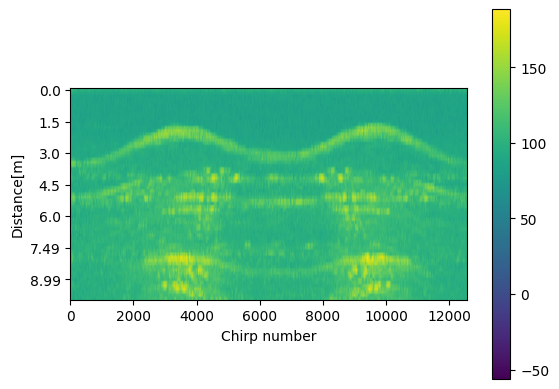

In [16]:
files = [
         # 'background',
         'wysoki_niski_3m_oskar_bartek_przodem',
         'wiatrak_4m',
         'wiatrak_2m_bartek_sciana',
         'randomowe_chodzonko_3os',
         'randomowe_chodzonko_1os_bartek',
         'odleglosc_4m_bartek_bokiem',
         'chodzonko_2os_2m_bartek_3m_oskar',
         'chodzonko_1os_4-1-8m_bartek',
         'bartek_sciana',
         'biegunko_1os_2m_rafal',
         'chodzonko_1os_2m_bartek',
         ]

differences = [
               # 1,
               # 5,
               # 10,
               # 25,
               # 50,
               100,
               # 250,
               # 500,
               # 1000
               ]

bg = loaded_file['2023_03_21']['background']
bg = bg[:, 0, 0, :]

for file in files:
    sample_file = loaded_file['2023_03_21'][file]
    sample_file = sample_file[:, 0, 0, :]
    sample_file = sample_file - np.average(bg, axis=0)
    print(f'----------------------------------------------------------')
    print(f'FILE: {file}')
    for difference in differences:

        frames_diff = diff_frames(sample_file, difference)  #odejmujemy ostatnią klatkę
        diff_spect, y = gen_spectogram(frames_diff)
        diff_spectdb = to_dB(diff_spect)
        print_spectogram(diff_spectdb, y, depth_limit=10)


In [ ]:
frames_diff = diff_frames(sample_file, 1)  #odejmujemy ostatnią klatkę
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=10)

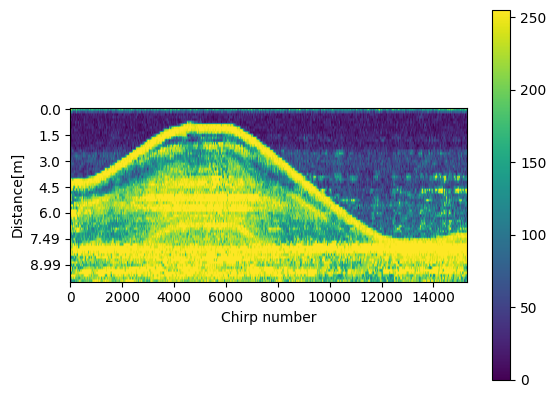

In [18]:
import cv2
ret2,th2 = cv2.threshold(diff_spectdb.astype('uint8'),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print_spectogram(th2, y, depth_limit=10)
# blur = cv2.GaussianBlur(diff_spectdb,(5,5),0)
# ret3,th3 = cv2.threshold(blur.astype('uint8'),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# print_spectogram(th3, y, depth_limit=10)